In [139]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0

In [140]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Load in the training dataset with augmentation applied
train_generator = train_datagen.flow_from_directory(
    '/Users/brycemartin/Documents/AI/bird-class-data/Train',
    target_size = (224,224),
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical'
)

# Only rescale the test set
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

# Load in the test dataset with only rescaling
test_generator = test_datagen.flow_from_directory(
    '/Users/brycemartin/Documents/AI/bird-class-data/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 9414 images belonging to 200 classes.
Found 2374 images belonging to 200 classes.


In [141]:
model = keras.Sequential([

    keras.layers.Conv2D(32, (3, 3), padding='same', activation=None, input_shape=(224, 224, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 2
    keras.layers.Conv2D(64, (3, 3), padding='same', activation=None),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Convolutional Layer 3
    keras.layers.Conv2D(128, (3, 3), padding='same', activation=None),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Flatten and classify
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),  # Dropout to prevent overfitting
    keras.layers.Dense(512, activation='relu'),  # Increase units in the dense layer
    keras.layers.Dropout(0.5),  # Dropout in the fully connected layer too
    keras.layers.Dense(200, activation='softmax')

])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 200)            │       102,600 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,577,480 (196.75 MB)

 Trainable params: 51,577,032 (196.75 MB)

 Non-trainable params: 448 (1.75 KB)

In [142]:
# Compile the Model
model.compile(
    optimizer = 'adam',    # Popular optimizer
    loss = 'categorical_crossentropy',   # Categorical crossentropy for classification tasks
    metrics = (['accuracy'])    # Measure the accuracy
)

In [143]:
with tf.device('/GPU:0'):   
    # Test the model
    history =  model.fit(
        train_generator,    # Traning dataset from our generator
        validation_data = test_generator,
        epochs = 10    # See all the images 10 times
    )

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 137s 451ms/step - accuracy: 0.0055 - loss: 364.7349 - val_accuracy: 0.0051 - val_loss: 156.8819
Epoch 2/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 129s 435ms/step - accuracy: 0.0062 - loss: 330.6408 - val_accuracy: 0.0105 - val_loss: 167.5549
Epoch 3/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 129s 438ms/step - accuracy: 0.0064 - loss: 287.6283 - val_accuracy: 0.0097 - val_loss: 125.2107
Epoch 4/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 131s 445ms/step - accuracy: 0.0082 - loss: 227.6267 - val_accuracy: 0.0131 - val_loss: 100.5440
Epoch 5/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 132s 449ms/step - accuracy: 0.0085 - loss: 189.7717 - val_accuracy: 0.0202 - val_loss: 75.8232
Epoch 6/10
295/295 ━━━━━━━━━━━━━━━━━━━━ 134s 454ms/step - accuracy: 0.0116 - loss: 146.3153 - val_accuracy: 0.0164 - val_loss: 58.5423
Epoch 7/10
129/295 ━━━━━━━━━━━━━━━━━━━━ 1:14 446ms/step - accuracy: 0.0108 - loss: 126.4722

KeyboardInterrupt: 

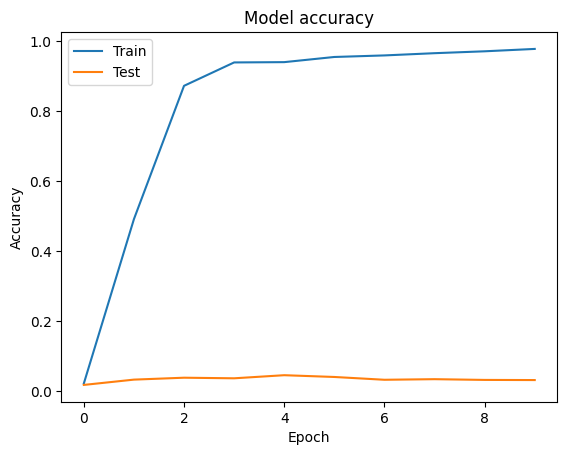

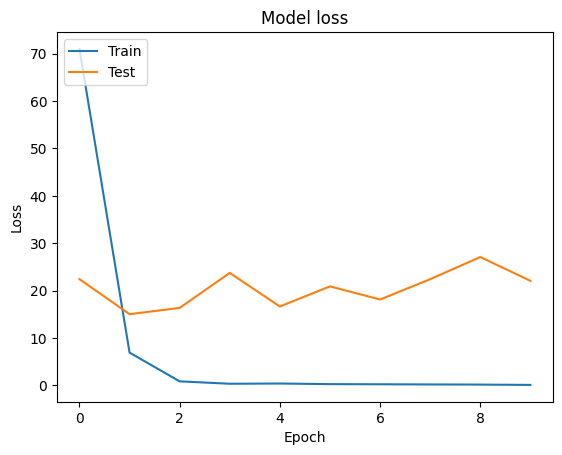

In [144]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [146]:
model.evaluate(test_generator)

75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.0131 - loss: 88.2357


[85.88764953613281, 0.011794439516961575]